In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib widget
from ipywidgets import widgets

In [2]:
if os.getcwd() != "C:\\Users\\Lawrence\\csv-05092023_VF1-TB\\csv":
    os.chdir("C:\\Users\\Lawrence\\csv-05092023_VF1-TB\\csv")
    print("changed path to: " + os.getcwd())
else:
    print(os.getcwd())

changed path to: C:\Users\Lawrence\csv-05092023_VF1-TB\csv


In [3]:
filelist = []
for file in os.listdir():
    filelist.append(file)
print(filelist)

['Run1_1Hz_SingleBedCenter_MiddleArmInSoil.csv', 'Run2_1Hz_FullCenterBedInSoil.csv', 'Run3_1Hz_AllBedInSoil.csv', 'Run4_2Hz_AllBedInSoil.csv', 'Run5_2Hz_Repeat4_SameBed.csv', 'Run6_3Hz_NewBed.csv', 'Run7_3Hz_NewBed_OuterBeds.csv', 'Run7_3Hz_NewBed_OuterBeds.xlsx']


In [4]:
df0 = pd.read_csv(filelist[0])
df1 = pd.read_csv(filelist[1])
df2 = pd.read_csv(filelist[2])
df3 = pd.read_csv(filelist[3])
df4 = pd.read_csv(filelist[4])
df5 = pd.read_csv(filelist[5])
df6 = pd.read_csv(filelist[6])

dfs = df0
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126869 entries, 0 to 126868
Data columns (total 79 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 126869 non-null  float64
 1   Accum_Press_bar      126869 non-null  float64
 2   tHold_B1Act6_ms      126869 non-null  int64  
 3   tHold_B1Act3_ms      126869 non-null  int64  
 4   tHold_B2Act6_ms      126869 non-null  int64  
 5   aActuator2B1_deg     126869 non-null  float64
 6   aActuator3B1_deg     126869 non-null  float64
 7   aActuator4B1_deg     126869 non-null  float64
 8   tHold_B2Act3_ms      126869 non-null  int64  
 9   aActuator1B1_deg     126869 non-null  float64
 10  tHold_B1Act1_ms      126869 non-null  int64  
 11  tHold_B2Act1_ms      126869 non-null  int64  
 12  System_State         126869 non-null  int64  
 13  tHold_B1Act2_ms      126869 non-null  int64  
 14  tHold_B1Act4_ms      126869 non-null  float64
 15  tHold_B1Act5_ms  

In [5]:
dfAct = df0.loc[:, dfs.columns.str.contains('deg')]
dfAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126869 entries, 0 to 126868
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   aActuator2B1_deg  126869 non-null  float64
 1   aActuator3B1_deg  126869 non-null  float64
 2   aActuator4B1_deg  126869 non-null  float64
 3   aActuator1B1_deg  126869 non-null  float64
 4   aActuator5B1_deg  126869 non-null  float64
 5   aActuator6B1_deg  126869 non-null  float64
 6   aActuator2B3_deg  126869 non-null  float64
 7   aActuator3B3_deg  126869 non-null  float64
 8   aActuator4B3_deg  126869 non-null  float64
 9   aActuator1B3_deg  126869 non-null  float64
 10  aActuator5B3_deg  126869 non-null  float64
 11  aActuator6B3_deg  126869 non-null  float64
 12  aActuator2B2_deg  126869 non-null  float64
 13  aActuator3B2_deg  126869 non-null  float64
 14  aActuator4B2_deg  126869 non-null  float64
 15  aActuator1B2_deg  126869 non-null  float64
 16  aActuator5B2_deg  12

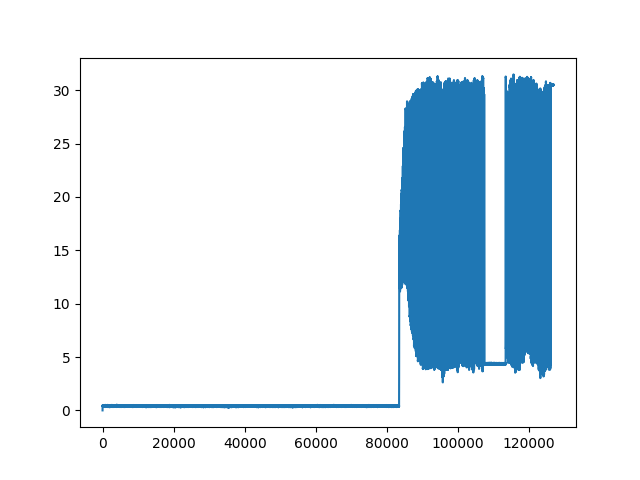

In [6]:
fig, ax = plt.subplots()

ax.plot(dfAct["aActuator1B1_deg"])

[238, 30, 27, 173, 8, 0.13]


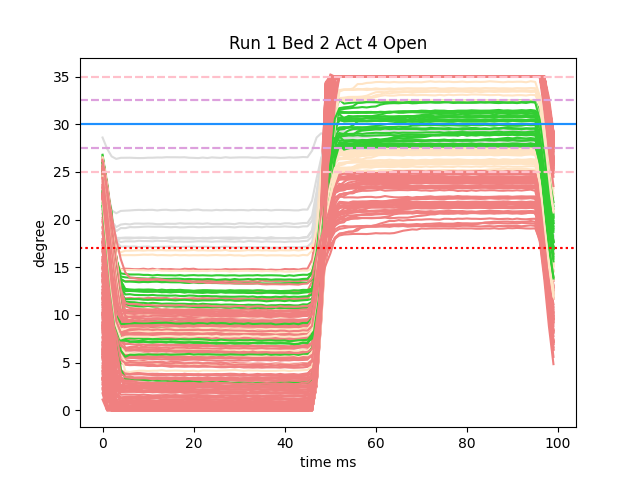

In [7]:
dfAct = df0.loc[:, dfs.columns.str.contains('deg')]

act = "aActuator4B2_deg"

fig, ax = plt.subplots()

hz = 100
x = range(0, hz)
dfAct = dfAct[83500:107400]
total = 0
valid = 0
mid = 0
notok = 0
invalid = 0

for i in range(0, int(len(dfAct[act])/(hz)-1)):
    wind = dfAct[act][i*hz+60:i*hz+70]
    total +=1
    if np.average(wind) > 17 and np.average(dfAct[act][i*hz+10:i*hz+20]) < 17:
        if np.average(wind) > 25 and np.average(wind) < 35:
            if np.average(wind) > 27.5 and np.average(wind) < 32.5:
                ax.plot(x, dfAct[act][i*hz:i*hz+hz], color = "limegreen")
                valid += 1
            else:
                ax.plot(x, dfAct[act][i*hz:i*hz+hz], color = "bisque")
                mid += 1
        else:
            ax.plot(x, dfAct[act][i*hz:i*hz+hz], color = "lightcoral")
            notok += 1
    else:
        ax.plot(x, dfAct[act][i*hz:i*hz+hz], color = "gainsboro")
        invalid += 1
     

ax.axhline(30, color = "dodgerblue")
ax.axhline(32.5, linestyle = "--", color = "plum")
ax.axhline(27.5, linestyle = "--", color = "plum")
ax.axhline(25, linestyle = "--", color = "pink")
ax.axhline(35, linestyle = "--", color = "pink")

    
ax.axhline(17, linestyle = ":", color = "red") #validity line

ax.set_title("Run 2 Bed 1 Act 1 Open")
ax.set_ylabel("degree")
ax.set_xlabel("time ms")
ax.axhline(30, color = "dodgerblue")
ax.axhline(32.5, linestyle = "--", color = "plum")
ax.axhline(27.5, linestyle = "--", color = "plum")
ax.axhline(25, linestyle = "--", color = "pink")
ax.axhline(35, linestyle = "--", color = "pink")

    
ax.axhline(17, linestyle = ":", color = "red") #validity line

ax.set_title("Run 1 Bed 2 Act 4 Open")
ax.set_ylabel("degree")
ax.set_xlabel("time ms")


print([total, valid, mid, notok, invalid, np.round(valid/(total-invalid), 3)])

In [8]:
for l in range(1,4): # 1 2 3 (Bed)
    for j in range(1,7): # 1 2 3 4 5 6 (actuator)
        dfAct = df0.loc[:, dfs.columns.str.contains('deg')]

        act = "aActuator"+str(j)+"B"+str(l)+"_deg"
        print(act)
        #fig, ax = plt.subplots()
        hz = 100
        x = range(0, hz)
        dfAct = dfAct[83500:107400]
        total = 0
        valid = 0
        mid = 0
        notok = 0
        invalid = 0

        for i in range(0, int(len(dfAct[act])/(hz)-1)):
            wind = dfAct[act][i*hz+60:i*hz+70]
            val = dfAct[act][i*hz+10:i*hz+20]
            total +=1
            if np.average(wind) > 17 and np.average(val) < 17:
                if np.average(wind) > 25 and np.average(wind) < 35:
                    if np.average(wind) > 27.5 and np.average(wind) < 32.5:
                        #ax.plot(x, dfAct[act][i*hz:i*hz+50], color = "limegreen")
                        valid += 1
                    else:
                        #ax.plot(x, dfAct[act][i*hz:i*hz+50], color = "bisque")
                        mid += 1
                else:
                    #ax.plot(x, dfAct[act][i*hz:i*hz+50], color = "lightcoral")
                    notok += 1
            else:
                #ax.plot(x, dfAct[act][i*hz:i*hz+50], color = "gainsboro")
                invalid += 1
        qo = [total, valid, mid, notok, invalid, np.round(valid/(total-invalid), 3)]
        print("Open: " + " ".join(str(x) for x in qo))

aActuator1B1_deg
Open: 238 220 5 11 2 0.932
aActuator2B1_deg
Open: 238 220 6 11 1 0.928
aActuator3B1_deg
Open: 238 206 19 12 1 0.869
aActuator4B1_deg
Open: 238 52 53 123 10 0.228
aActuator5B1_deg
Open: 238 211 15 11 1 0.89
aActuator6B1_deg
Open: 238 180 50 7 1 0.759
aActuator1B2_deg
Open: 238 123 67 46 2 0.521
aActuator2B2_deg
Open: 238 225 4 7 2 0.953
aActuator3B2_deg
Open: 238 209 24 2 3 0.889
aActuator4B2_deg
Open: 238 30 27 173 8 0.13
aActuator5B2_deg
Open: 238 86 134 18 0 0.361
aActuator6B2_deg
Open: 238 214 21 2 1 0.903
aActuator1B3_deg
Open: 238 216 10 12 0 0.908
aActuator2B3_deg
Open: 238 220 7 11 0 0.924
aActuator3B3_deg
Open: 238 150 63 25 0 0.63
aActuator4B3_deg
Open: 238 206 18 12 2 0.873
aActuator5B3_deg
Open: 238 215 5 14 4 0.919
aActuator6B3_deg
Open: 238 194 38 6 0 0.815


Close: 238 42 131 57 8 0.183


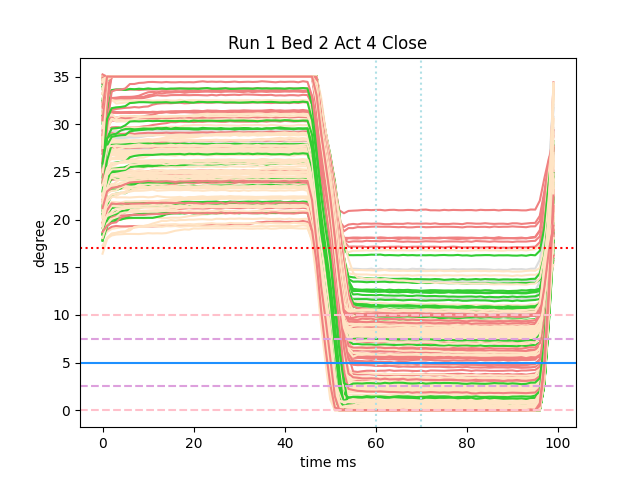

In [9]:
dfAct = df0.loc[:, dfs.columns.str.contains('deg')]
act = "aActuator4B2_deg"

fig, ax = plt.subplots()
hz = 100
x = range(0, hz)
dfAct = dfAct[83500:107400]
totalc = 0
validc = 0
midc = 0
notokc = 0
invalidc = 0

for i in range(0, int(len(dfAct[act])/(hz)-1)):
    wind = dfAct[act][i*hz+10:i*hz+20]
    val = dfAct[act][i*hz+60:i*hz+70]
    totalc +=1
    if np.average(val) > 17 and np.average(wind) < 17:
        if np.average(wind) > 0 and np.average(wind) < 10:
            if np.average(wind) > 2.5 and np.average(wind) < 7.5:
                ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "limegreen")
                validc += 1
            else:
                ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "bisque")
                midc += 1
        else:
            ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "lightcoral")
            notokc += 1
    else:
        ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "gainsboro")
        invalidc += 1
     

ax.axhline(5, color = "dodgerblue")
ax.axhline(2.5, linestyle = "--", color = "plum")
ax.axhline(7.5, linestyle = "--", color = "plum")
ax.axhline(0, linestyle = "--", color = "pink")
ax.axhline(10, linestyle = "--", color = "pink")

ax.axvline(10+hz/2, linestyle = ":", color = "powderblue")
ax.axvline(20+hz/2, linestyle = ":", color = "powderblue")

    
ax.axhline(17, linestyle = ":", color = "red") #validity line

ax.set_title("Run 1 Bed 2 Act 4 Close")
ax.set_ylabel("degree")
ax.set_xlabel("time ms")
qc = [totalc, validc, midc, notokc, invalidc, np.round(validc/(totalc-invalidc), 3)]
print("Close: " + " ".join(str(x) for x in qc))

In [10]:
for l in range(1,4):
    for j in range(1,7):
        dfAct = df0.loc[:, dfs.columns.str.contains('deg')]
        act = "aActuator"+str(j)+"B"+str(l)+"_deg"
        print(act)
        #fig, ax = plt.subplots()
        hz = 100
        x = range(0, hz)
        dfAct = dfAct[83500:107400]
        totalc = 0
        validc = 0
        midc = 0
        notokc = 0
        invalidc = 0

        for i in range(0, int(len(dfAct[act])/(hz)-1)):
            wind = dfAct[act][i*hz+10:i*hz+20]
            val = dfAct[act][i*hz+60:i*hz+70]
            totalc +=1
            if np.average(val) > 17 and np.average(wind) < 17:
                if np.average(wind) > 0 and np.average(wind) < 10:
                    if np.average(wind) > 2.5 and np.average(wind) < 7.5:
                        #ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "limegreen")
                        validc += 1
                    else:
                        #ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "bisque")
                        midc += 1
                else:
                    #ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "lightcoral")
                    notokc += 1
            else:
                #ax.plot(x, dfAct[act][int(i*hz+hz/2):int(i*hz+3*hz/2)], color = "gainsboro")
                invalidc += 1
                
        #print([totalc, validc, midc, notokc, invalidc])
        qc = [totalc, validc, midc, notokc, invalidc, np.round(validc/(totalc-invalidc), 3)]
        print("Close: " + " ".join(str(x) for x in qc))

aActuator1B1_deg
Close: 238 201 10 25 2 0.852
aActuator2B1_deg
Close: 238 200 10 27 1 0.844
aActuator3B1_deg
Close: 238 206 9 22 1 0.869
aActuator4B1_deg
Close: 238 94 73 61 10 0.412
aActuator5B1_deg
Close: 238 80 104 53 1 0.338
aActuator6B1_deg
Close: 238 187 20 30 1 0.789
aActuator1B2_deg
Close: 238 190 28 18 2 0.805
aActuator2B2_deg
Close: 238 198 11 27 2 0.839
aActuator3B2_deg
Close: 238 193 21 21 3 0.821
aActuator4B2_deg
Close: 238 42 131 57 8 0.183
aActuator5B2_deg
Close: 238 200 16 22 0 0.84
aActuator6B2_deg
Close: 238 193 12 32 1 0.814
aActuator1B3_deg
Close: 238 206 10 22 0 0.866
aActuator2B3_deg
Close: 238 200 10 28 0 0.84
aActuator3B3_deg
Close: 238 143 67 28 0 0.601
aActuator4B3_deg
Close: 238 205 9 22 2 0.869
aActuator5B3_deg
Close: 238 189 9 36 4 0.808
aActuator6B3_deg
Close: 238 180 33 25 0 0.756


In [11]:
qo = [total, valid, mid, notok, invalid, np.round(valid/(total-invalid), 3)]
print("Open: " + " ".join(str(x) for x in qo))
qc = [totalc, validc, midc, notokc, invalidc, np.round(validc/(totalc-invalidc), 3)]
print("Close: " + " ".join(str(x) for x in qc))

Open: 238 194 38 6 0 0.815
Close: 238 180 33 25 0 0.756


In [215]:
validc+midc+notokc+invalidc == totalc

True

[319, 216, 3, 9, 91, 0.677]


In [117]:
invalid

91

In [373]:
i = 2
hz = 100
dfAct[act][int(i*hz-hz/2):int(i*hz+hz/2)]

41650    35.0
41651    35.0
41652    35.0
41653    35.0
41654    35.0
         ... 
41745    35.0
41746    35.0
41747    35.0
41748    35.0
41749    35.0
Name: aActuator4B2_deg, Length: 100, dtype: float64

Text(0, 0.5, 'mA')

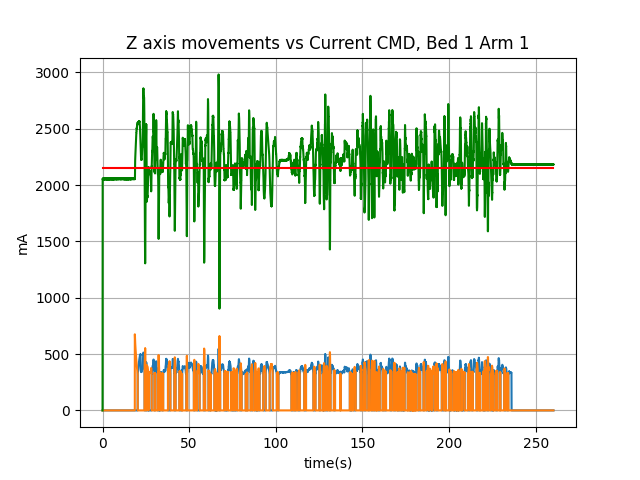

In [11]:
dfz = df6
dfz.rename({'curr_up_B1Arm1_ma_1': 'curr_up_B3Arm1_ma' }, axis=1, inplace=True)

fig, ax = plt.subplots()

ax.plot(dfz["Time"], dfz["curr_up_B3Arm1_ma"])
ax.plot(dfz["Time"], dfz["curr_dn_B3Arm1_ma"])
ax.plot(dfz["Time"], dfz["wheel_B3Arm1_adc"], color = "green")
ax.plot([0,dfz["Time"].iloc[-1]],[2150,2150], color = "red")
ax.grid()
ax.set_title("Z axis movements vs Current CMD, Bed 1 Arm 1")
ax.set_xlabel("time(s)")
ax.set_ylabel("mA")


In [26]:
start = 2500
dfz = df6
dfzWADCall = []
for i in range(1,4):
    for j in range(1,4):
        dfzWADCall.append(np.asarray(dfz[["Time", "wheel_B"+str(i)+"Arm"+str(j)+"_adc","curr_up_B"+str(i)+"Arm"+str(j)+
                                     "_ma","curr_dn_B"+str(i)+"Arm"+str(j)+"_ma"]][start:22500]))

dfzWADCall[3]


array([[  25.        , 2227.        ,  341.        ,    0.        ],
       [  25.01      , 2217.        ,  338.27272727,    0.        ],
       [  25.02      , 2205.        ,  335.        ,    0.        ],
       ...,
       [ 224.97      , 2110.        ,    0.        ,  330.90909091],
       [ 224.98      , 2109.        ,    0.        ,  331.18181818],
       [ 224.99      , 2131.        ,    0.        ,  325.18181818]])

In [28]:
def ZaxisQual(dfzWADC, target):
    res = []
    for i in range(0, np.shape(dfzWADC)[0]):
        if dfzWADC[i][1] > target:
            if dfzWADC[i][2] > 0 and dfzWADC[i][3] == 0:
                res.append(True)
            else:
                res.append(False)
        else:
            if dfzWADC[i][2] == 0 and dfzWADC[i][3] > 0:
                res.append(True)
            else:
                res.append(False)
    return(res.count(True)/np.shape(dfzWADC)[0])


target = 2150

for d in dfzWADCall:
    print(np.round(ZaxisQual(d, target), 3))
    


0.998
0.985
0.998
0.998
0.998
0.997
0.996
0.998
0.998
